**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

**Download samples based on lem_pos table**

In [ ]:
# download samples into seperate variables
sample1 = pd.read_csv('lem_pos_first.csv')
sample2 = pd.read_csv('lem_pos_second.csv')

In [ ]:
sample1.head()

,word_form_id,word_form,lemma,pos,sent_id,text_numb
0,1,ярослав,ярослав,NOUN,1,1
1,2,грицак,грицак,NOUN,1,1
2,3,нариси,нарис,NOUN,2,1
3,4,з,з,PREP,2,1
4,5,історії,історія,NOUN,2,1


In [ ]:
sample2.head()

,word_form_id,word_form,lemma,pos,sent_id,text_numb
0,1,веселий,веселий,ADJF,1,1
1,2,цвинтар,цвинтар,NOUN,1,1
2,3,над,над,PREP,2,1
3,4,осіннім,осінній,ADJF,2,1
4,5,озером,озеро,NOUN,2,1


**Building frequency dictionaries based on samples**

In [ ]:
def create_frequency_dictionaries(dataframe):
    """
    Create frequency dictionaries for specified fields in the given dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe containing relevant data.

    Returns:
    list of pandas.Series: A list of frequency dictionaries for each specified field.
                           Each dictionary contains field values as keys and their respective
                           frequencies as values, sorted in descending order.
    """
    fields = ['lemma', 'word_form', 'pos']
    fd_dicts = []
    for field in fields:
        fd_dicts.append(dataframe.groupby(field, sort=True)[field].count().sort_values(ascending=False))
    return fd_dicts

In [ ]:
fd_lemma1, fd_wordform1, fd_pos1 = create_frequency_dictionaries(sample1)

In [ ]:
fd_lemma2, fd_wordform2, fd_pos2 = create_frequency_dictionaries(sample2)

In [ ]:
fd_wordform2

word_form
і             912
не            377
в             344
на            325
як            262
             ... 
коник           1
коней           1
кондукторе      1
кондаками       1
ґрунті          1
Name: word_form, Length: 8662, dtype: int64

In [ ]:
# # download frequency dictionaries into csv files
# for fd in zip(['fd_lemma1', 'fd_wordform1', 'fd_pos1', 'fd_lemma2', 'fd_wordform2', 'fd_pos2'], [fd_lemma1, fd_wordform1, fd_pos1, fd_lemma2, fd_wordform2, fd_pos2]):
#     fd[1].to_frame(name='абсолютна частота').to_csv(f'{fd[0]}.csv')

**Relative error for POS tags**

In [ ]:
freq_pos1 = pd.DataFrame(sample1.groupby('pos', sort=True)['pos'].count().sort_values(ascending=False).reset_index(name="count"))
freq_pos1['relative error'] = freq_pos1['count'].apply(lambda x: 1.96/math.sqrt(x))
freq_pos1

,pos,count,relative error
0,NOUN,7350,0.022862
1,ADJF,4062,0.030753
2,PREP,2324,0.040657
3,VERB,2117,0.042599
4,CONJ,1412,0.052160
5,NPRO,1326,0.053825
6,ADVB,731,0.072493
7,PRCL,440,0.093439
8,NUMR,129,0.172568
9,GRND,59,0.255170


In [ ]:
freq_pos2 = pd.DataFrame(sample2.groupby('pos', sort=True)['pos'].count().sort_values(ascending=False).reset_index(name="count"))
freq_pos2['relative error'] = freq_pos2['count'].apply(lambda x: 1.96/math.sqrt(x))
freq_pos2

,pos,count,relative error
0,NOUN,6035,0.025230
1,VERB,3274,0.034254
2,CONJ,2280,0.041048
3,ADJF,2244,0.041376
4,NPRO,1765,0.046653
5,PREP,1748,0.046880
6,PRCL,1122,0.058514
7,ADVB,1067,0.060003
8,GRND,168,0.151217
9,NUMR,131,0.171246


**Build frequency dictionaries based on subsamples**

In [ ]:
def divide_into_subsamples(dataframe):
  """
  Divide a data into 20 approximately equal-sized subsamples.

  Parameters:
  dataframe (pandas.DataFrame): The input DataFrame to be divided.

  Returns:
  list of pandas.DataFrame: A list containing 20 subsamples of the input DataFrame.
  """
  # randomly distribute data, ensuring reproducibility of results
  shuffled = dataframe.sample(frac=1, random_state = np.random.RandomState(2))
  # divide the data into 20 subsamples of 1000 word forms each
  return np.array_split(shuffled, 20)

In [ ]:
def fd_subsample(subsamples):
    """
    Calculate frequency dictionaries for lemma, word form, and part-of-speech (POS)
    based on a list of subsamples.

    Parameters:
    subsamples (list of pandas.DataFrame): A list containing 20 subsamples of data.

    Returns:
    tuple: A tuple containing three lists of frequency dictionaries - one for lemma,
           one for word form, and one for part-of-speech (POS).
    """
    fd_lemma = []
    fd_wordform = []
    fd_pos = []

    for i in range(20):
        fd_lemma.append(pd.DataFrame(subsamples[i]).groupby('lemma', sort=True)['lemma'].count().sort_values(ascending=False).to_dict())
        fd_wordform.append(pd.DataFrame(subsamples[i]).groupby('word_form', sort=True)['word_form'].count().sort_values(ascending=False).to_dict())
        fd_pos.append(pd.DataFrame(subsamples[i]).groupby('pos', sort=True)['pos'].count().sort_values(ascending=False).to_dict())

    return fd_lemma, fd_wordform, fd_pos

In [ ]:
subsamples_1 = divide_into_subsamples(sample1)
fd_lemmas1, fd_wordforms1, fd_poses1 = fd_subsample(subsamples_1)

In [ ]:
subsamples_2 = divide_into_subsamples(sample2)
fd_lemmas2, fd_wordforms2, fd_poses2 = fd_subsample(subsamples_2)

In [ ]:
fd_lemmas1

[{'і': 28,
  'у': 27,
  'не': 17,
  'з': 17,
  'на': 16,
  'український': 15,
  'бути': 14,
  'польський': 13,
  'та': 12,
  'національний': 11,
  'в': 11,
  'російський': 10,
  'який': 10,
  'цей': 8,
  'держава': 8,
  'свій': 8,
  'для': 8,
  'до': 7,
  'як': 7,
  'україна': 7,
  'він': 7,
  'вони': 7,
  'що': 7,
  'українець': 6,
  'вона': 5,
  'політичний': 5,
  'за': 5,
  'інший': 5,
  'ідея': 5,
  'а': 5,
  'від': 4,
  'це': 4,
  'вплив': 4,
  'під': 4,
  'право': 4,
  'народ': 4,
  'мати': 4,
  'окремий': 4,
  'той': 4,
  'серед': 4,
  'рух': 4,
  'й': 4,
  'без': 4,
  'лише': 3,
  'кінець': 3,
  'так': 3,
  'промисловий': 3,
  'галичина': 3,
  'початок': 3,
  'населення': 3,
  'між': 3,
  'ставати': 3,
  'селянство': 3,
  'рік': 3,
  'увесь': 3,
  'великий': 3,
  'колишній': 3,
  'могти': 3,
  'мова': 3,
  'територія': 3,
  'історія': 3,
  'два': 3,
  'програма': 2,
  'група': 2,
  'грушевський': 2,
  'руський': 2,
  'губернія': 2,
  'росія': 2,
  'державний': 2,
  'київ': 2,
 

In [ ]:
# def load_to_csv(sequence_of_fd, name):
#     for fd in enumerate(sequence_of_fd,start=1):
#         pd.DataFrame.from_dict(fd[1],orient='index').to_csv(f'{name}{fd[0]}.csv')

**Building frequency polygons**

In [ ]:
def abs_freq_dist(subsamples, lemma):
  """
  Calculate and visualize the absolute frequency distribution of a specific lemma across subsamples.

  Parameters:
  subsamples (list of pandas.DataFrame): A list of subsamples containing data.
  lemma (str): The lemma for which the absolute frequency distribution is calculated.

  Returns:
  None
  """
  absolute_frequencies = []

  for sub_sample in subsamples:
      # count the absolute frequency of the desired word in each of the subsamples and add it to the list above
      absolute_frequencies.append(sub_sample[sub_sample['lemma'] == lemma].shape[0])

  # create a dataframe data type
  abs_f = pd.DataFrame(absolute_frequencies, columns=['absolute_freqencies'])

  print(f"Absolute frequencies in each of the 20 subsamples \n\n{abs_f}\n\n")
  # print(sum(abs_f['absolute_freqencies'].to_list()))

  # group absolute frequencies by value
  grouped = abs_f.groupby('absolute_freqencies')['absolute_freqencies'].count()

  print(f"\nGrouped absolute frequencies by variant \n\n{grouped}\n\n")

  vis = grouped.plot(title=f"Polygon of absolute word frequencies for word {lemma.upper()}")
  vis.set_xlabel("Xi variant")
  vis.set_ylabel("Ni variant frequency")

### **Sample 1**

#### word ПОЛІТИЧНИЙ

Absolute frequencies in each of the 20 subsamples 

    absolute_freqencies
0                     5
1                     4
2                     4
3                     7
4                     3
5                     2
6                     6
7                     5
8                     1
9                     3
10                   10
11                    5
12                    3
13                    5
14                    2
15                    5
16                    4
17                    6
18                    6
19                    7



Grouped absolute frequencies by variant 

absolute_freqencies
1     1
2     2
3     3
4     3
5     5
6     3
7     2
10    1
Name: absolute_freqencies, dtype: int64




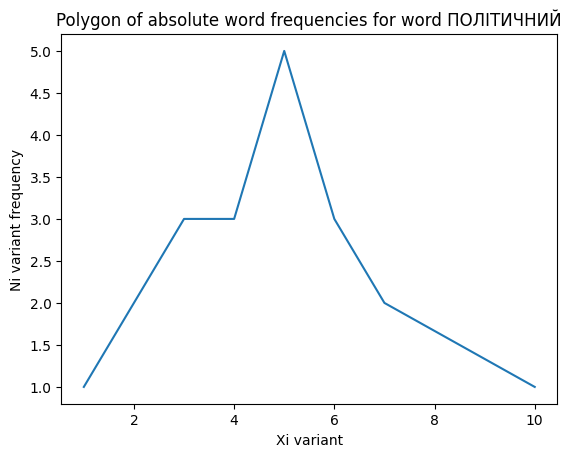

In [ ]:
abs_freq_dist(subsamples_1, 'політичний')

**h = R / K = (10 - 1) / 4 = 2.25**

| Interval | Ni | The middle of the interval (Xi)| XiNi |
| --- | --- | --- | --- |
| 1 - 3,25 | 6 | 2,1 | 12,7 |
| 3,25 - 5,5 | 8 | 4,4 | 35 |
|5,5 - 7,75  | 5 | 6,6 | 33,1 |
| 7,75 - 10 | 1 | 8,9 | 8,9 |

x̄ = 89,7 / 20 = 4,48

Text(0, 0.5, 'Ni')

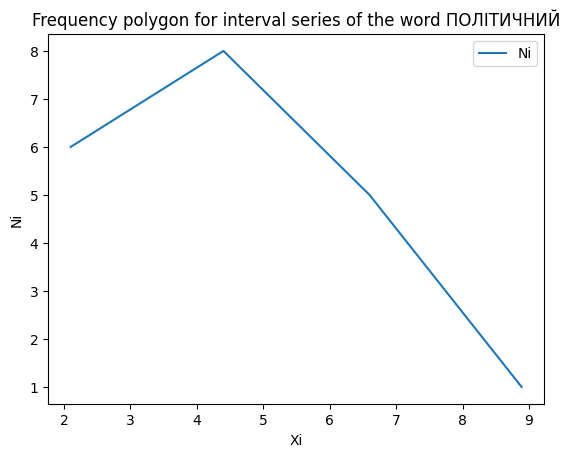

In [ ]:
intervals = {'Ni': [6,8,5,1], 'Xi': [2.1,4.4,6.6,8.89]}

ints = pd.DataFrame(data=intervals).plot(x='Xi', y='Ni', title="Frequency polygon for interval series of the word ПОЛІТИЧНИЙ")
ints.set_xlabel("Xi")
ints.set_ylabel("Ni")

#### word УКРАЇНА

Absolute frequencies in each of the 20 subsamples 

    absolute_freqencies
0                     7
1                     8
2                    13
3                     7
4                     7
5                    15
6                    13
7                     5
8                    14
9                    17
10                   10
11                   11
12                   11
13                    6
14                    8
15                    5
16                    9
17                    7
18                   10
19                    8



Grouped absolute frequencies by variant 

absolute_freqencies
5     2
6     1
7     4
8     3
9     1
10    2
11    2
13    2
14    1
15    1
17    1
Name: absolute_freqencies, dtype: int64




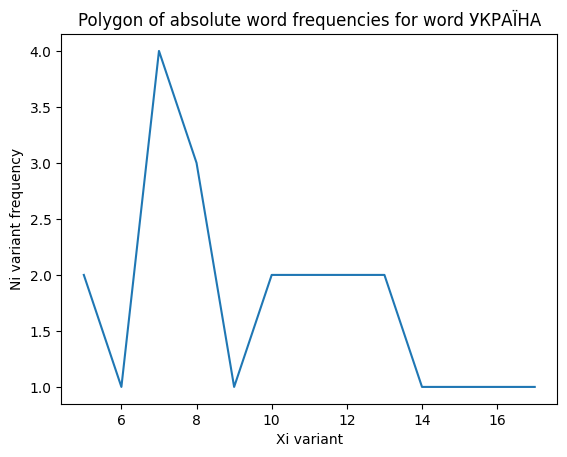

In [ ]:
abs_freq_dist(subsamples_1, 'україна')

**h = R / K = (17 - 5) / 6 = 2**

| Interval | Ni | The middle of the interval (Xi)| XiNi |
| --- | --- | --- | --- |
| 5 - 7 | 7 | 6 | 42 |
| 7 - 9 | 8 | 8 | 64 |
|9 - 11 | 5 | 10 | 50 |
| 11 - 13 | 5 | 12 | 60 |
| 13 - 15 | 4 | 14 | 56 |
| 15 - 17 | 2 | 16 | 32 |

x̄ = 304 / 20 = 15,2

Text(0, 0.5, 'Ni')

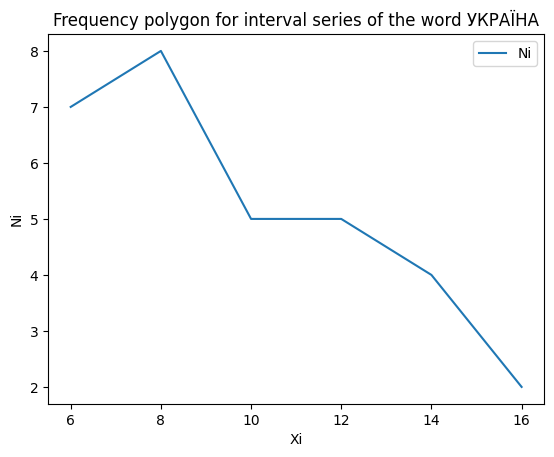

In [ ]:
intervals = {'Ni': [7,8,5,5,4,2], 'Xi': [6,8,10,12,14,16]}

ints = pd.DataFrame(data=intervals).plot(x='Xi', y='Ni', title="Frequency polygon for interval series of the word УКРАЇНА")
ints.set_xlabel("Xi")
ints.set_ylabel("Ni")

### **Sample 2**

#### word РУКА

Absolute frequencies in each of the 20 subsamples 

    absolute_freqencies
0                     3
1                     3
2                     1
3                     4
4                     3
5                     1
6                     2
7                     1
8                     4
9                     6
10                    2
11                    4
12                    3
13                    2
14                    5
15                    2
16                    7
17                    3
18                    4
19                    1



Grouped absolute frequencies by variant 

absolute_freqencies
1    4
2    4
3    5
4    4
5    1
6    1
7    1
Name: absolute_freqencies, dtype: int64




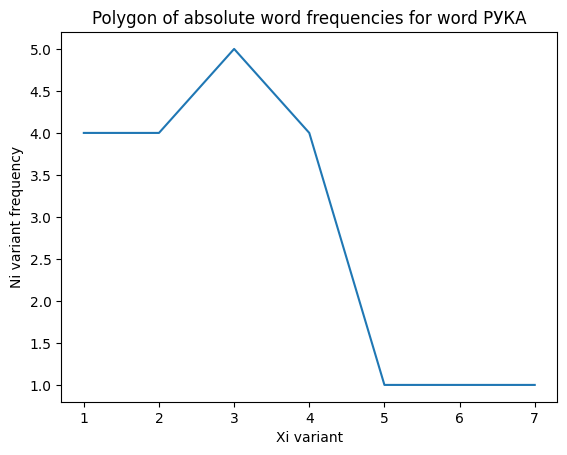

In [ ]:
abs_freq_dist(subsamples_2, 'рука')

**h = R / K = (7 - 1) / 3 = 2**

| Interval | Ni | The middle of the interval (Xi)| XiNi |
| --- | --- | --- | --- |
| 1 - 3 | 13 | 2 | 26 |
| 3 - 5 | 10 | 4 | 40 |
|5 - 7 | 3 | 6 | 18 |

x̄ = 84 / 20 = 4,2

Text(0, 0.5, 'Ni')

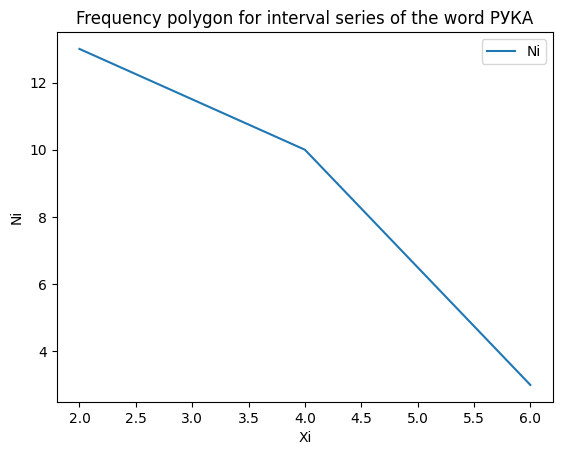

In [ ]:
intervals = {'Ni': [13,10,3], 'Xi': [2,4,6]}

ints = pd.DataFrame(data=intervals).plot(x='Xi', y='Ni', title="Frequency polygon for interval series of the word РУКА")
ints.set_xlabel("Xi")
ints.set_ylabel("Ni")

#### word ДУША

Absolute frequencies in each of the 20 subsamples 

    absolute_freqencies
0                     4
1                     2
2                     4
3                     3
4                     1
5                     5
6                     2
7                     6
8                     4
9                     2
10                    1
11                    6
12                    9
13                    4
14                    3
15                    5
16                    3
17                    5
18                    4
19                    2



Grouped absolute frequencies by variant 

absolute_freqencies
1    2
2    4
3    3
4    5
5    3
6    2
9    1
Name: absolute_freqencies, dtype: int64




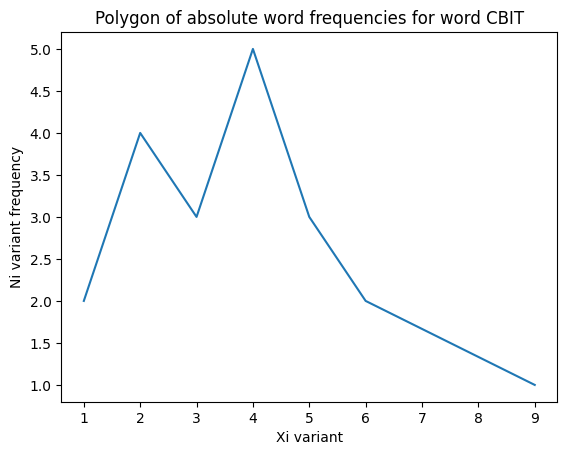

In [ ]:
abs_freq_dist(subsamples_2, 'світ')

**h = R / K = (9 - 1) / 4 = 2**

| Interval | Ni | The middle of the interval (Xi)| XiNi |
| --- | --- | --- | --- |
| 1 - 3 | 9 | 2 | 18 |
| 3 - 5 | 11 | 4 | 44 |
|5 - 7 | 5 | 6 | 30 |
|7 - 9 | 1 | 8 | 8 |

x̄ = 100 / 20 = 5

Text(0, 0.5, 'Ni')

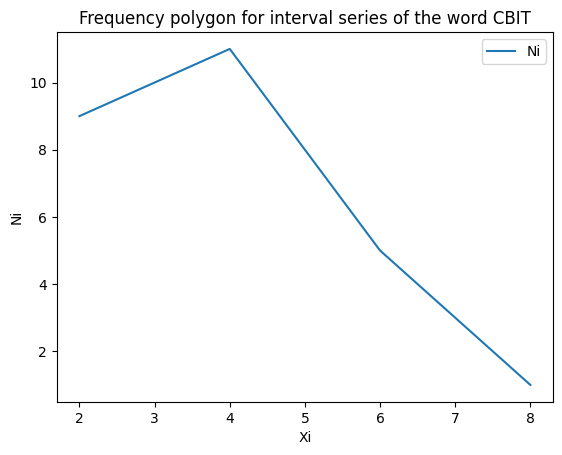

In [ ]:
intervals = {'Ni': [9,11,5,1], 'Xi': [2,4,6,8]}

ints = pd.DataFrame(data=intervals).plot(x='Xi', y='Ni', title="Frequency polygon for interval series of the word СВІТ")
ints.set_xlabel("Xi")
ints.set_ylabel("Ni")